In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install d2l==1.0.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 67.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 67.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.3
    Uninstalling requests-2.32.3:
      Successfully uninstalled requests-2.32.3
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.2
    Uninstalling pyparsing-3.1.2:
      Successfully uninstalled pyparsing-3.1.2
  Attempting uninstall: numpy
    Found e

In [3]:
import torch
from d2l import torch as d2l

In [4]:
X = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
X.sum(dim=0, keepdims=True), X.sum(dim=1, keepdims=True), X.sum(axis=0)  # 与 X.sum(dim=0) 相同

(tensor([[5., 7., 9.]]),
 tensor([[ 6.],
         [15.]]),
 tensor([5., 7., 9.]))

$$\mathrm{softmax}(\mathbf{X})_{ij} = \frac{\exp(\mathbf{X}_{ij})}{\sum_k \exp(\mathbf{X}_{ik})}.$$

In [5]:
# softmax
def softmax(X):
    X_exp = torch.exp(X)  # 幂运算
    partition = X_exp.sum(dim=1, keepdims=True)  # 每行的总和，用于计算归一化常数
    return X_exp / partition  # 将每行除以其归一化常数，确保结果的总和为1. The broadcasting mechanism is applied here

In [6]:
X = torch.rand((2, 5))
X_prob = softmax(X)
X, X_prob, X_prob.sum(1)

(tensor([[0.0505, 0.6363, 0.1079, 0.9097, 0.5774],
         [0.5007, 0.0210, 0.5920, 0.3786, 0.6623]]),
 tensor([[0.1264, 0.2271, 0.1339, 0.2985, 0.2141],
         [0.2094, 0.1296, 0.2294, 0.1854, 0.2462]]),
 tensor([1.0000, 1.0000]))

In [7]:
class SoftmaxRegressionScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W = torch.normal(0, sigma, size=(num_inputs, num_outputs),
                              requires_grad=True)  # 初始化权重参数
        self.b = torch.zeros(num_outputs, requires_grad=True)  # 初始化偏置参数

    def parameters(self):
        return [self.W, self.b]

In [8]:
@d2l.add_to_class(SoftmaxRegressionScratch)
def forward(self, X):
    X = X.reshape((-1, self.W.shape[0]))  # 将二维矩阵展平为向量
    return softmax(torch.matmul(X, self.W) + self.b)

In [9]:
y = torch.tensor([0, 2])  # labels
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y, y_hat, y_hat[[0, 1], y]  # 使用 y 作为 y_hat 中概率的列索引 (0, 0) (1, 2)

(tensor([0, 2]),
 tensor([[0.1000, 0.3000, 0.6000],
         [0.3000, 0.2000, 0.5000]]),
 tensor([0.1000, 0.5000]))

In [10]:
# 交叉熵损失函数
def cross_entropy(y_hat, y):
    return -torch.log(y_hat[list(range(len(y_hat))), y]).mean()

cross_entropy(y_hat, y)

tensor(1.4979)

In [11]:
# loss function
@d2l.add_to_class(SoftmaxRegressionScratch)
def loss(self, y_hat, y):
    return cross_entropy(y_hat, y)

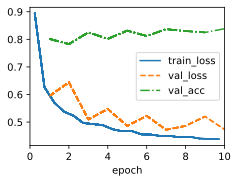

In [12]:
data = d2l.FashionMNIST(batch_size=256)  # 读取数据
model = SoftmaxRegressionScratch(num_inputs=784, num_outputs=10, lr=0.15)  # num_outputs: labels
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)  # 开始训练

In [13]:
X, y = next(iter(data.val_dataloader()))  # 读取验证集数据
preds = model(X).argmax(axis=1)  # 预测
preds.shape

torch.Size([256])

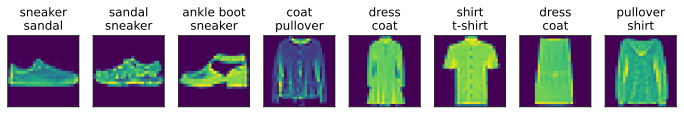

In [14]:
wrong = preds.type(y.dtype) != y  # 预测错误
X, y, preds = X[wrong], y[wrong], preds[wrong]
labels = [a+'\n'+b for a, b in zip(
    data.text_labels(y), data.text_labels(preds))]  # 第一行为正确的 label 第二行为预测的 label
data.visualize([X, y], labels=labels)